## All Cancer Integration Notebook 04: Annotation 

This is the Jupyter Notebook to annotate the integrated meta AnnData object from all datasets. As a result, cells from the integrated meta AnnData are annotated briefly.

In [1]:
import scanpy as sc
import celltypist
from rich import print
from celltypist import models

In [2]:
# Load the meta AnnData
post = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_cluster_clean.h5ad')

In [3]:
print(post)

AnnData object with n_obs × n_vars = 1300958 × 559
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 
'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 
'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 
'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 
'major_cancer_type_order', 'cancer_type_order'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 
'highly_variable_nbatches', 'highly_variable_intersection'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'leiden', 
'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## 1. Cell annotation with CellTypist

In [4]:
post.raw.X.expm1().sum(axis = 1)

matrix([[ 9999.99934143],
        [10000.00051373],
        [ 9999.99982159],
        ...,
        [10000.00001831],
        [ 9999.99974831],
        [10000.00053825]])

It always shows timeout when downloading models here. So we directly download the models from the browser (https://www.celltypist.org/models) and move to `/home/s4543064/.celltypist/data/models`

In [5]:
# Load the immune cell model
model = models.Model.load(model = 'Immune_All_High.pkl')

In [6]:
model

CellTypist model with 32 cell types and 6639 features
    date: 2022-07-16 08:53:00.959521
    details: immune populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: B cells, B-cell lineage, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX

In [7]:
model.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

In [8]:
# Predict cell identities using this loaded model
predictions = celltypist.annotate(
    post.raw.to_adata(), 
    model = 'Immune_All_High.pkl', 
    majority_voting = True # the default majority_voting is False, and it's faster
) 

🔬 Input data has 1300958 cells and 7662 genes


🔗 Matching reference genes in the model


🧬 2247 features used for prediction


⚖️ Scaling input data


🖋️ Predicting labels


✅ Prediction done!


👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it


⛓️ Over-clustering input data with resolution set to 30


🗳️ Majority voting the predictions


✅ Majority voting done!


In [9]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,Macrophages,166,Monocytes
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,Double-positive thymocytes,166,Monocytes
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,DC,166,Monocytes
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,Double-positive thymocytes,166,Monocytes
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,Monocytes,166,Monocytes
...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,Double-positive thymocytes,238,Macrophages
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,Macrophages,238,Macrophages
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,Macrophages,238,Macrophages
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,Macrophages,216,Macrophages


In [10]:
adata_annotated = predictions.to_adata(prefix='celltypist_')

In [11]:
adata_annotated

AnnData object with n_obs × n_vars = 1300958 × 7662
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [12]:
adata_annotated.obs

,cancer_type,dataset,tissue,uni_barcode,disease_progression,sample_barcode,n_genes,n_genes_by_counts,total_counts,total_counts_mt,...,_scvi_batch,_scvi_labels,leiden_scVI,major_cancer_type,major_cancer_type_order,cancer_type_order,celltypist_predicted_labels,celltypist_over_clustering,celltypist_majority_voting,celltypist_conf_score
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGCTAGTGG-1,diagnosis,GSM7512002_Sample4D,2376,2376,11016.0,943.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Macrophages,166,Monocytes,0.014566
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGATGCGT-1,diagnosis,GSM7512002_Sample4D,3565,3565,21188.0,1127.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.041038
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGGTGTTG-1,diagnosis,GSM7512002_Sample4D,2886,2886,11618.0,894.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,DC,166,Monocytes,0.008621
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGTTCGCGC-1,diagnosis,GSM7512002_Sample4D,2986,2986,13508.0,661.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.006639
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGCAATGAATG-1,diagnosis,GSM7512002_Sample4D,2187,2187,9031.0,414.0,...,402,0,3,leukemia,leukemia,acute_myeloid_leukemia,Monocytes,166,Monocytes,0.008897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,1976,1976,8004.0,3758.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Double-positive thymocytes,238,Macrophages,0.035551
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2120,2120,16639.0,12168.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.005597
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2009,2009,6494.0,2877.0,...,286,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.012868
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,3274,3274,9095.0,433.0,...,286,0,11,healthy_donor,healthy_donor,healthy_donor,Macrophages,216,Macrophages,0.025826


In [13]:
adata_annotated.obs['celltypist_majority_voting'].value_counts()

celltypist_majority_voting
T cells                       424684
Double-positive thymocytes    258579
Macrophages                   233415
Monocytes                     165734
B cells                       110130
Double-negative thymocytes     49771
ILC                            34092
pDC                             7504
DC                              7476
HSC/MPP                         6019
Plasma cells                    3054
Megakaryocytes/platelets         500
Name: count, dtype: int64

In [14]:
adata_annotated.obs['celltypist_conf_score'].describe()

count    1.300958e+06
mean     2.316462e-01
std      3.293196e-01
min      4.289843e-06
25%      1.001099e-02
50%      4.647211e-02
75%      3.388811e-01
max      9.999920e-01
Name: celltypist_conf_score, dtype: float64

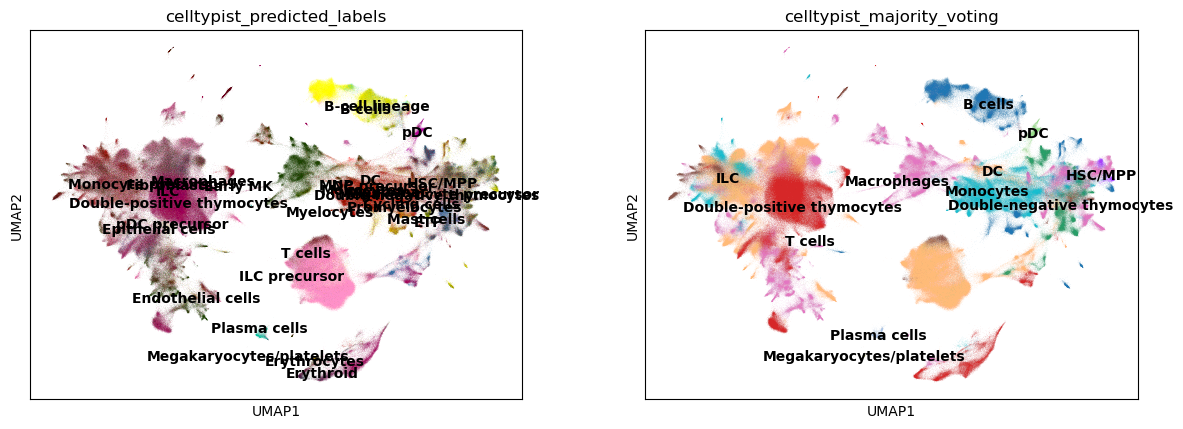

In [15]:
# Since we have calculated the neighborhood info in notebook 2, can directly plot the UMAP
sc.pl.umap(
    adata_annotated, 
    color = ['celltypist_predicted_labels', 'celltypist_majority_voting'],
    legend_loc = 'on data'
)


Since some cells have very low annotation-confidence, we can consider them as unknowns.

In [16]:
adata_annotated_unknown = adata_annotated.copy()
adata_annotated_unknown

AnnData object with n_obs × n_vars = 1300958 × 7662
    obs: 'cancer_type', 'dataset', 'tissue', 'uni_barcode', 'disease_progression', 'sample_barcode', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'gmm_pct_count_clusters_keep', 'filter_rna', 'cell_type_from_paper', 'malignant_from_paper', 'age_months', 'age', 'sex', 'recurrent', 'cancer_subtype', 'metastatic', '_scvi_batch', '_scvi_labels', 'leiden_scVI', 'major_cancer_type', 'major_cancer_type_order', 'cancer_type_order', 'celltypist_predicted_labels', 'celltypist_over_clustering', 'celltypist_majority_voting', 'celltypist_conf_score'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'cancer_type_colors', 'cancer_type_order_colors', 'hvg', 'leiden', 'leiden_scVI_colors', 'major_cancer_type_order_colors', 'neighbors', 'pca', 'sample_barcode_colors', 'umap', 'celltypist_predicted_labels_colors', 'celltypist_majority_voting_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'dista

In [17]:
# If the confidence score is less than 0.95, we consider the cell as unknown

adata_annotated_unknown.obs['filtered_cell_labels'] = 'Unknown'
adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['celltypist_conf_score'] > 0.95, 'filtered_cell_labels'] = adata_annotated_unknown.obs.loc[adata_annotated_unknown.obs['celltypist_conf_score'] > 0.95, 'celltypist_majority_voting']

adata_annotated_unknown.obs

,cancer_type,dataset,tissue,uni_barcode,disease_progression,sample_barcode,n_genes,n_genes_by_counts,total_counts,total_counts_mt,...,_scvi_labels,leiden_scVI,major_cancer_type,major_cancer_type_order,cancer_type_order,celltypist_predicted_labels,celltypist_over_clustering,celltypist_majority_voting,celltypist_conf_score,filtered_cell_labels
GSE235923_AAACCTGAGCTAGTGG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGCTAGTGG-1,diagnosis,GSM7512002_Sample4D,2376,2376,11016.0,943.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Macrophages,166,Monocytes,0.014566,Unknown
GSE235923_AAACCTGAGGATGCGT-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGATGCGT-1,diagnosis,GSM7512002_Sample4D,3565,3565,21188.0,1127.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.041038,Unknown
GSE235923_AAACCTGAGGGTGTTG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGGGTGTTG-1,diagnosis,GSM7512002_Sample4D,2886,2886,11618.0,894.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,DC,166,Monocytes,0.008621,Unknown
GSE235923_AAACCTGAGTTCGCGC-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGAGTTCGCGC-1,diagnosis,GSM7512002_Sample4D,2986,2986,13508.0,661.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Double-positive thymocytes,166,Monocytes,0.006639,Unknown
GSE235923_AAACCTGCAATGAATG-1_GSM7512002_Sample4D,acute_myeloid_leukemia,GSE235923,bone_marrow,GSE235923_AAACCTGCAATGAATG-1,diagnosis,GSM7512002_Sample4D,2187,2187,9031.0,414.0,...,0,3,leukemia,leukemia,acute_myeloid_leukemia,Monocytes,166,Monocytes,0.008897,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSE223373_TTCACGCAGCGAGTAAACGTATCA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,1976,1976,8004.0,3758.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Double-positive thymocytes,238,Macrophages,0.035551,Unknown
GSE223373_TTCACGCAGTCGTAGAAAGACGGA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2120,2120,16639.0,12168.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.005597,Unknown
GSE223373_TTCACGCAGTGTTCTAGTACGCAA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,2009,2009,6494.0,2877.0,...,0,7,healthy_donor,healthy_donor,healthy_donor,Macrophages,238,Macrophages,0.012868,Unknown
GSE223373_TTCACGCATAGGATGATCTTCACA_GSM6946667_WT-RBG-N_matrix,healthy_donor,GSE223373,Kidney,NaN,NaN,GSM6946667_WT-RBG-N_matrix,3274,3274,9095.0,433.0,...,0,11,healthy_donor,healthy_donor,healthy_donor,Macrophages,216,Macrophages,0.025826,Unknown


In [18]:
adata_annotated_unknown.obs['filtered_cell_labels'].value_counts()

filtered_cell_labels
Unknown                       1210714
T cells                         64633
B cells                         14622
Macrophages                      6395
Monocytes                        2784
Double-positive thymocytes       1387
Plasma cells                      160
ILC                               158
Double-negative thymocytes         98
DC                                  4
pDC                                 3
Name: count, dtype: int64

In [19]:
len(adata_annotated_unknown.obs['filtered_cell_labels'].unique())

11

In [20]:
immune_cells = adata_annotated_unknown.obs['filtered_cell_labels'].unique().tolist()
immune_cells

['Unknown',
 'T cells',
 'B cells',
 'Double-positive thymocytes',
 'Monocytes',
 'Macrophages',
 'Plasma cells',
 'ILC',
 'Double-negative thymocytes',
 'pDC',
 'DC']

... storing 'filtered_cell_labels' as categorical


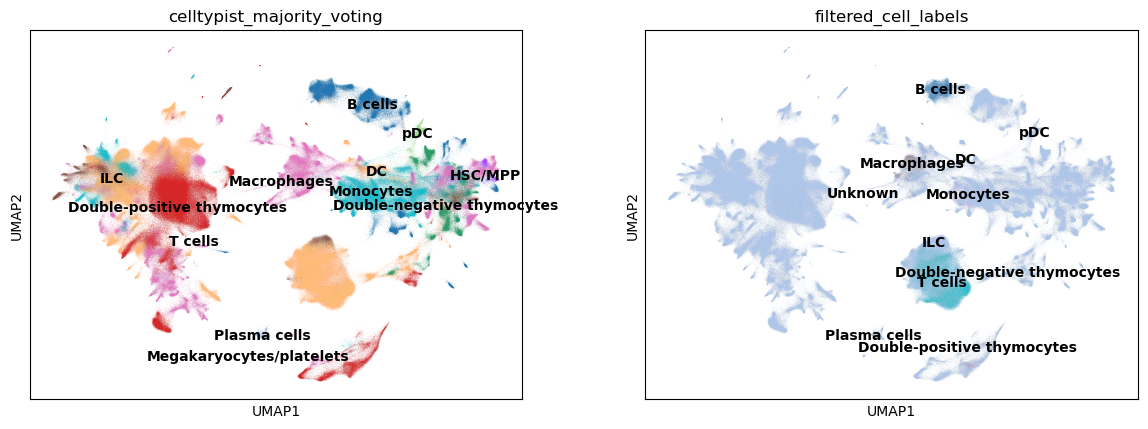

In [21]:
sc.pl.umap(
    adata_annotated_unknown, 
    color = ['celltypist_majority_voting', 'filtered_cell_labels'],
    legend_loc = 'on data'
)

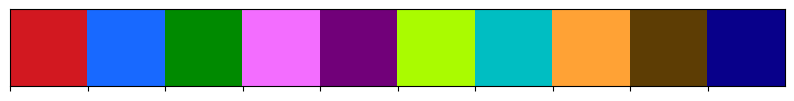

In [22]:
import glasbey
import seaborn as sns

glasbey_palette = glasbey.create_palette(palette_size=len(immune_cells) - 1)
sns.palplot(glasbey_palette)

In [23]:
my_palette = {'Unknown': '#ecf0f1'}

count = 0
for cell_type in immune_cells:
    if cell_type not in my_palette:
        my_palette[cell_type] = glasbey_palette[count]
        count += 1

In [24]:
my_palette

{'Unknown': '#ecf0f1',
 'T cells': '#d21820',
 'B cells': '#1869ff',
 'Double-positive thymocytes': '#008a00',
 'Monocytes': '#f36dff',
 'Macrophages': '#710079',
 'Plasma cells': '#aafb00',
 'ILC': '#00bec2',
 'Double-negative thymocytes': '#ffa235',
 'pDC': '#5d3d04',
 'DC': '#08008a'}

In [25]:
immune_cells.remove('Unknown')
immune_cells

['T cells',
 'B cells',
 'Double-positive thymocytes',
 'Monocytes',
 'Macrophages',
 'Plasma cells',
 'ILC',
 'Double-negative thymocytes',
 'pDC',
 'DC']

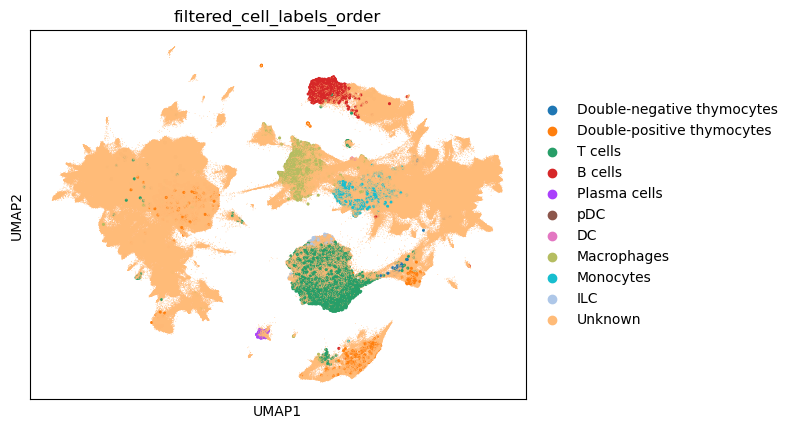

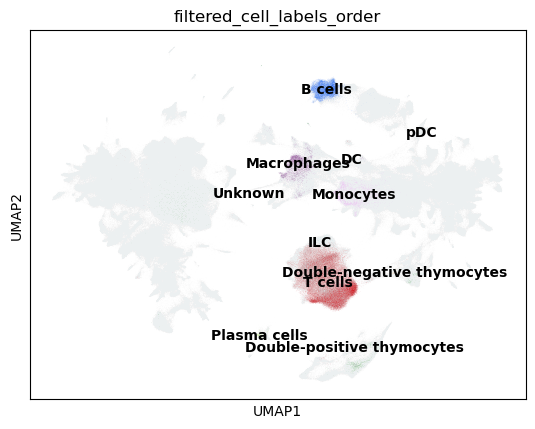

In [26]:
import pandas as pd

filtered_cell_labels_order = ['Double-negative thymocytes', 'Double-positive thymocytes', 'T cells', 'B cells', 'Plasma cells', 'pDC', 'DC', 'Macrophages', 'Monocytes', 'ILC', 'Unknown']

adata_annotated_unknown.obs['filtered_cell_labels_order'] = pd.Categorical(
    values=adata_annotated_unknown.obs.filtered_cell_labels, categories=filtered_cell_labels_order, ordered=True
)

sc.pl.umap(
    adata_annotated_unknown, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    size=[1 if cell == 'Unknown' else 20 for cell in adata_annotated_unknown.obs['filtered_cell_labels_order']],
)

sc.pl.umap(
    adata_annotated_unknown, 
    color = ['filtered_cell_labels_order'],
    palette = my_palette,
    legend_loc='on data'
)

In [3]:
# Save the annotated adata
adata_annotated_unknown.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_celltypist_high.h5ad', compression='gzip')

In [28]:
# Transfer the cell anotations to the pre-integration meta adata
pre = sc.read_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_pca_clean.h5ad')

In [29]:
pre.obs['celltypist_majority_voting'] = adata_annotated_unknown.obs['celltypist_majority_voting']
pre.obs['filtered_cell_labels'] = adata_annotated_unknown.obs['filtered_cell_labels']
pre.obs['filtered_cell_labels_order'] = adata_annotated_unknown.obs['filtered_cell_labels_order']

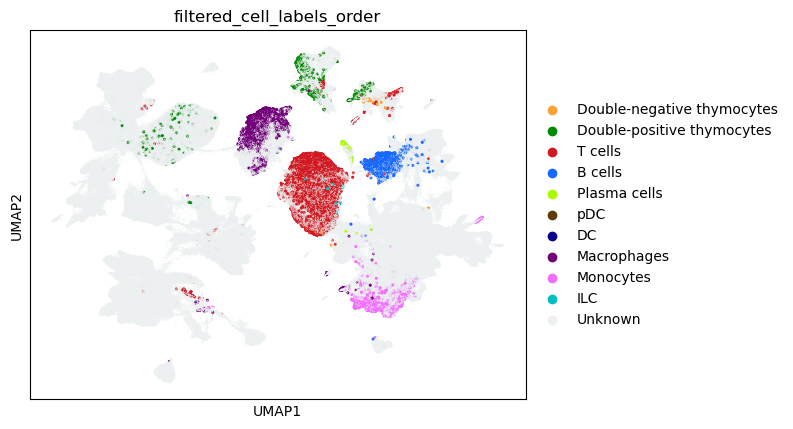

In [30]:
# UMAP before integration
sc.pl.umap(
    pre, 
    color = ['filtered_cell_labels_order'],
    # groups=immune_cells, 
    palette = my_palette,
    size=[1 if cell == 'Unknown' else 20 for cell in pre.obs['filtered_cell_labels_order']],
)

In [31]:
# Save the clustered pre-integration meta adata
pre.write_h5ad('/scratch/user/s4543064/Xiaohan_Summer_Research/write/all_cancer_meta_anndata_scVI_pca_celltypist_high.h5ad', compression='gzip')

## 2. Compute the immune cell composition

In [6]:
my_palette = {
    'Unknown': '#ecf0f1',
    'T cells': '#d21820',
    'B cells': '#1869ff',
    'Double-positive thymocytes': '#008a00',
    'Monocytes': '#f36dff',
    'Macrophages': '#710079',
    'Plasma cells': '#aafb00',
    'ILC': '#00bec2',
    'Double-negative thymocytes': '#ffa235',
    'pDC': '#5d3d04',
    'DC': '#08008a'
}

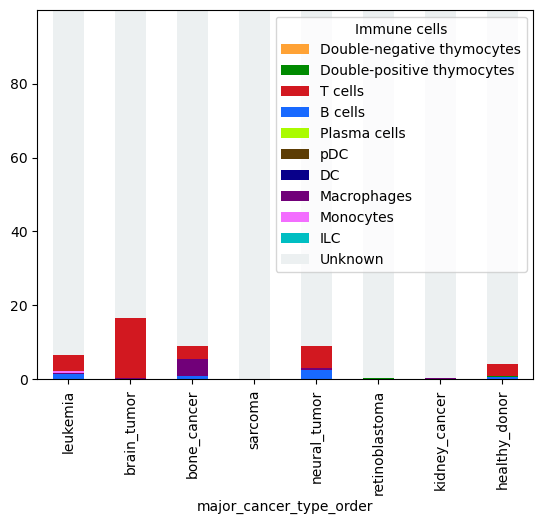

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 10, 1, 5, 6, 4, 9]
custom_legend = ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='upper right', title='Immune cells')

plt.show()


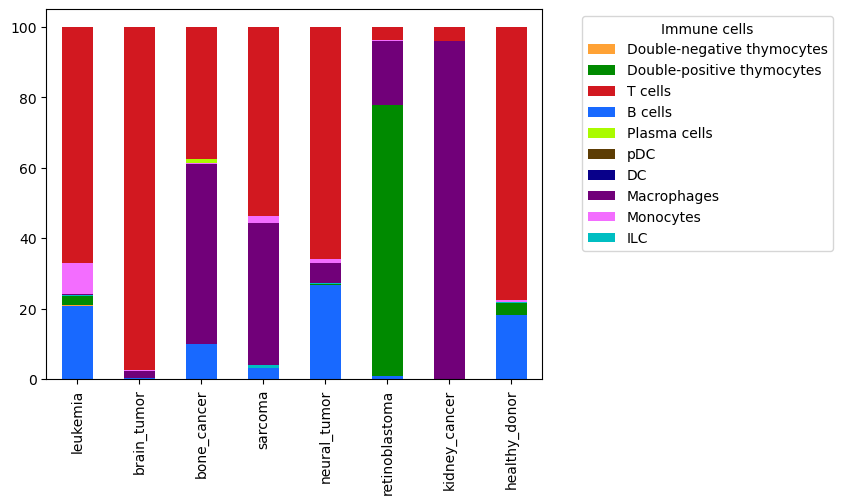

In [10]:
# What if we exclude the unknown celss

# Immune cell composition for each major cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['major_cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()

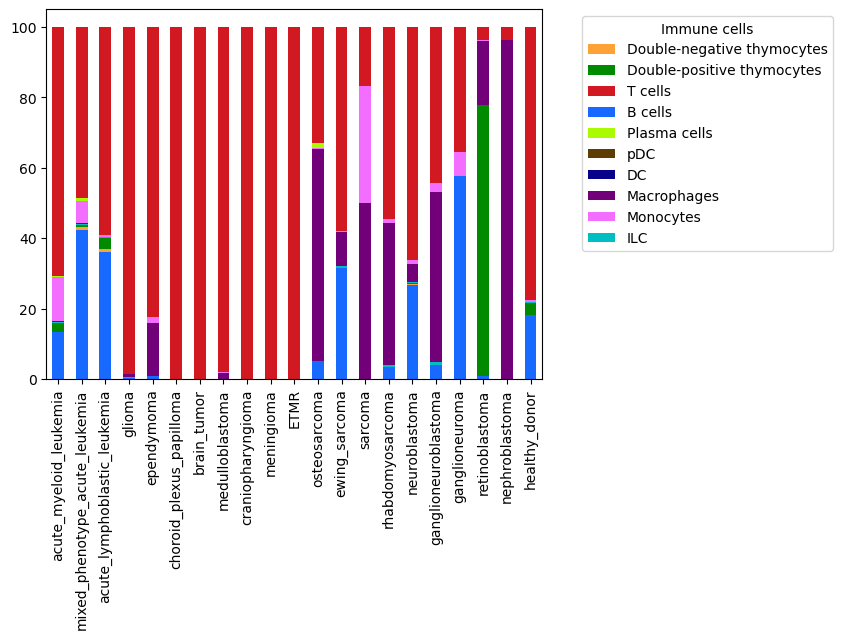

In [11]:
# Immune cell composition for each cancer type
df = adata_annotated_unknown.obs[adata_annotated_unknown.obs['filtered_cell_labels'] != 'Unknown']
df2 = pd.crosstab(df['cancer_type_order'], df['filtered_cell_labels']).apply(lambda r: r/r.sum() * 100, axis = 1)
ax = df2.plot.bar(stacked=True, color=[my_palette[cell] for cell in df2.columns])

# Custom the legend order
handles, labels = ax.get_legend_handles_labels()
order = [2, 3, 8, 0, 7, 9, 1, 5, 6, 4]
custom_legend = ax.legend(
    [handles[idx] for idx in order], [labels[idx] for idx in order], 
    loc='upper right', title='Immune cells',
    bbox_to_anchor=(1.6, 1)
)

# Remove the title of the whole plot
plt.gca().set_xlabel('')

plt.show()
